# 2.3.8. OPTICS

In [31]:
from sklearn.cluster import OPTICS, cluster_optics_dbscan
import matplotlib.gridspec as gridspec
import matplotlib.pyplot as plt
import numpy as np

In [32]:
%matplotlib inline

In [33]:
# make the random numbers predictable
np.random.seed(0)
n_points_per_cluster = 250

# np.random.randn(d0, d1, d2..., dn) -> return a smaple from the standard normal distribution
# param: dimensions of the returned array
C1 = [-5, -2] + .8 * np.random.randn(n_points_per_cluster, 2)
C2 = [4, -1] + .1 * np.random.randn(n_points_per_cluster, 2)
C3 = [1, -2] + .2 * np.random.randn(n_points_per_cluster, 2)
C4 = [-2, 3] + .3 * np.random.randn(n_points_per_cluster, 2)
C5 = [3, -2] + 1.6 * np.random.randn(n_points_per_cluster, 2)
C6 = [5, 6] + 2 * np.random.randn(n_points_per_cluster, 2)

# np.vstack(tup) -> stack arrays in sequence vertically
X = np.vstack((C1, C2, C3, C4, C5, C6))

In [34]:
# xi -> determines the minimum steppness on the reachability plot that constitutes a cluster boundary
# min_cluster_size -> minimum number of samples in an OPTICS cluster, expressed as an absolut number of a fraction
clust = OPTICS(min_samples=50, xi=0.05, min_cluster_size=.05)
clust.fit(X)

OPTICS(min_cluster_size=0.05, min_samples=50)

In [35]:
# cluster_optics_dbscan(*, reachability, core_distances, ordering, eps)
# -> performs DBSCAN extraction for an arbitrary epsilon

labels_050 = cluster_optics_dbscan(reachability=clust.reachability_,
                                   core_distances=clust.core_distances_,
                                   ordering=clust.ordering_,
                                   eps=0.5)

labels_200 = cluster_optics_dbscan(reachability=clust.reachability_,
                                   core_distances=clust.core_distances_,
                                   ordering=clust.ordering_,
                                   eps=2)

In [36]:
space = np.arange(len(X))
reachability = clust.reachability_[clust.ordering_]
labels = clust.labels_[clust.ordering_]

In [37]:
set(labels)

{-1, 0, 1, 2, 3, 4}

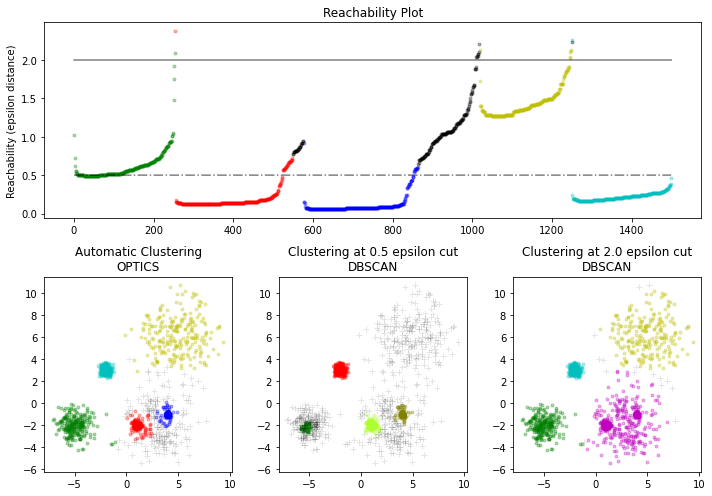

In [38]:
# plot cannot be displayed when divided into cells

plt.figure(figsize=(10, 7))
# a grid layout to place subplots within a figure
G = gridspec.GridSpec(2, 3)
# add an Axes to the current figure or retrieve an existing Axes
ax1 = plt.subplot(G[0, :])
ax2 = plt.subplot(G[1, 0])
ax3 = plt.subplot(G[1, 1])
ax4 = plt.subplot(G[1, 2])

### Reachability plot

colors = ['g.', 'r.', 'b.', 'y.', 'c.']
for klass, color in zip(range(0, 5), colors):
    Xk = space[labels == klass]
    Rk = reachability[labels == klass]
    ax1.plot(Xk, Rk, color, alpha=0.3)
ax1.plot(space[labels == -1], reachability[labels == -1], 'k.', alpha=0.3)
# np.full_like(a, fill_value, dtype=None, order='K', subok=True, shape=None)
# -> return a full array with the same shape and types as a given array
ax1.plot(space, np.full_like(space, 2., dtype=float), 'k-', alpha=0.5)
ax1.plot(space, np.full_like(space, 0.5, dtype=float), 'k-.', alpha=0.5)
ax1.set_ylabel('Reachability (epsilon distance)')
ax1.set_title('Reachability Plot')

### OPTICS

colors = ['g.', 'r.', 'b.', 'y.', 'c.']
for klass, color in zip(range(0, 5), colors):
    Xk = X[clust.labels_ == klass]
    ax2.plot(Xk[:, 0], Xk[:, 1], color, alpha=0.3)
ax2.plot(X[clust.labels_ == -1, 0], X[clust.labels_ == -1, 1], 'k+', alpha=0.1)
ax2.set_title('Automatic Clustering\nOPTICS')

### DBSCAN at 0.5

colors = ['g', 'greenyellow', 'olive','r', 'b', 'c']
for klass, color in zip(range(0, 6), colors):
    Xk = X[labels_050 == klass]
    ax3.plot(Xk[:, 0], Xk[:, 1], color, alpha=0.3, marker='.')
ax3.plot(X[labels_050 == -1, 0], X[labels_050 == -1, 1], 'k+', alpha=0.1)
ax3.set_title('Clustering at 0.5 epsilon cut\nDBSCAN')

### DBSCAN at 2.

colors = ['g.', 'm.', 'y.', 'c.']
for klass, color in zip(range(0, 4), colors):
    Xk = X[labels_200 == klass]
    ax4.plot(Xk[:, 0], Xk[:, 1], color, alpha=0.3)
ax4.plot(X[labels_200 == -1, 0], X[labels_200 == -1, 1], 'k+', alpha=0.1)
ax4.set_title("Clustering at 2.0 epsilon cut\nDBSCAN")

plt.tight_layout()
plt.show()